# 3D Reconstruction



| <img src="figs/reconstructed-1.png" width="600px" /> | <img src="figs/reconstructed-2.png" width="600px" /> |
|:-------------------------------------------------------|:-------------------------------------------------------|
| <img src="figs/reconstructed-3.png" width="600px" /> | <img src="figs/reconstructed-4.png" width="600px" /> |

# Last Lecture

- 01: Image Formation Models (Ch. 2)
- 02: Image Operators and Transforms (Ch. 3)
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- **04: Image Alignment and Stitching (Ch. 8)**
- 05: 3D Reconstruction (Ch. 13)

We saw how to:
- solve for geometric transformations between images,
- use these transformation to stitch images.

$\rightarrow$ relate points of one image plane to points in the other...
- ...without reconstructing 3D scene.

# This Lecture

- 01: Image Formation Models (Ch. 2)
- 02: Image Operators and Transforms (Ch. 3)
- 03: Feature Detection, Matching, Segmentation (Ch. 7)
- 04: Image Alignment and Stitching (Ch. 8)
- **05: 3D Reconstruction (Ch. 13)**


$\rightarrow$ Now, we reconstruct the 3D scene.


# Some Images Are Already 3D...

<center><img src="figs/05_brains.jpeg" width=800px alt="default"/></center>



# ...But most of them are not

<center><img src="figs/05_sfm_ex.png" width=1200px alt="default"/></center>

# ...But most of them are not

<center><img src="figs/05_cryoem.png" width=900px alt="default"/></center>

# Projection operator

- Computer vision: See only one side of objects
- Biological Imaging: Very often there is an integration

<center><img src="figs/05_sfm_ex.png" width=400px alt="default"/></center>

# Projection operator

- Computer vision: See only one side of objects
- Biological Imaging: Very often there is an integration

<center><img src="figs/05_cryoem.png" width=600px alt="default"/></center>

# Recall: Image Formation Model


<center><img src="figs/05_triang.png" width=900px alt="default"/></center>

# Projection in Image Formation Model

The projection of a real world point $P$ to the digital image plane is:
$$p 
= 
K  \begin{bmatrix}
I_3 & 0
\end{bmatrix}
\begin{bmatrix}
R & T \\
0 & 1
\end{bmatrix} P
= M P
$$

where:
- $M$ is the  projection matrix, composed of:
  - $K$ the intrinsic camera matrix,
  - $R$ the extrinsic rotation,
  - $t$ the extrinsic translation.
  
  
<center><img src="figs/05_triang.png" width=300px alt="default"/></center>

# 3D Reconstruction

- **[Triangulation](#sec-syllabus)**
  - Lines of Sight
  - Linear method
  - Non-linear method
  
- [Structure from Motion](#sec-ece)

- [Active and Volumetric Stereo](#sec-ece)

- [Reconstruction in Biology (invited speaker)](#sec-ece)


# Triangulation

$\color{#EF5645}{\text{Triangulation}}$ is the process of determining the location of a 3D point $P$ given its projections $p$ and $p'$ into two images. It can be extended to >2 images.


<center><img src="figs/05_triang.png" width=900px alt="default"/></center>

# 3D Reconstruction

- **[Triangulation](#sec-syllabus)**
  - **Lines of Sight**
  - Linear method
  - Non-linear method
  
- [Structure from Motion](#sec-ece)

- [Active and Volumetric Stereo](#sec-ece)

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Triangulation via Lines of Sight

Given:
- 2 cameras with known camera intrinsic parameters K and K′,
- relative extrinsic rotation and translation R, T of these cameras.
- 2 locations $p, p'$ of an unknown point $P$ in the 2 image planes.

Triangulation determines the 3D location of $P$ by computing:
- the two "lines of sight": defined by the camera centers O1, O2 and the image locations p, p′,
- their intersection.



# Triangulation via Lines of Sight: Limitations

In pratice:

<center><img src="figs/05_triang_pb.png" width=700px alt="default"/></center>


# Triangulation via Lines of Sight: Limitations

This process does not work very well in practice, because:
- p and p′ are noisy,
- the camera calibration parameters are not precise.

Thus, finding the intersection point may be:
- problematic,
- impossible: two lines may never intersect (most often).

# 3D Reconstruction

- **[Triangulation](#sec-syllabus)**
  - Lines of Sight
  - **Linear method**
  - Non-linear method
  
- [Structure from Motion](#sec-ece)

- [Active and Volumetric Stereo](#sec-ece)

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Triangulation 

<center><img src="figs/05_triang.png" width=800px alt="default"/></center>

# Set-up

Given:
- 2 cameras with known camera intrinsic parameters K and K′,
- relative extrinsic rotation and translation R, T of these cameras.
- 2 locations $p, p'$ of an unknown point $P$ in the 2 image planes.

We write:
- $p = MP = (x, y, 1)$ and $p' = M'P = (x', y', 1)$:
  - with $M, M'$ projection matrices of the two cameras.

Note: $P$ is unknown.

<center><img src="figs/05_triang.png" width=500px alt="default"/></center>

# Triangulation via Solving a Linear System

We can form a system of linear equations by writing: 
- $p \times MP = 0$: necessary condition for $p = MP$
- $p' \times M'P = 0$: necessary condition for $p' = M'P$

The equation $p \times MP = 0$ in $P$ gives:
$$\begin{align*}
x(M_3P ) − (M_1P ) &= 0  \\
y(M_3P ) − (M_2P ) &= 0 \\
x(M_2P ) − y'(M_1P ) &= 0
\end{align*}$$
where $M_i$ is the ith row of the projection matrix $M$.

# Triangulation via Solving a Linear System

Combining these questions gives the system $AP = 0$ in $P$ where:

$$A = \begin{bmatrix}
x M_3 - M_1 \\
y M_3 - M_2 \\
x' M'_3 - M'_1 \\
y'M'_3 - M_2'
\end{bmatrix}$$

which can be solved to give an estimate of $P$.

# From 2 to Multiple Cameras

Contrarily to the method using the lines of sight, this method can handle multiple cameras as well. 
- Appends additional rows to A corresponding to the added constraints.


# 3D Reconstruction

- **[Triangulation](#sec-syllabus)**
  - Lines of Sight
  - Linear method
  - **Non-linear method**
  
- [Structure from Motion](#sec-ece)

- [Active and Volumetric Stereo](#sec-ece)

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Triangulation 

<center><img src="figs/05_triang.png" width=800px alt="default"/></center>

# From Linear Method to Nonlinear Method

With previous method:
- we solve $p \times MP = 0$ in $P$, (necessary for $p = MP$),
- together with $p' \times M'P = 0$ in $P$, (necessary for $p' = M'P$)

With this method:
- we minimize $|| p - MP ||^2$ in $P$.
- together with $|| p' - M'P ||^2$ in $P$.

# Reprojection Error

$\color{#EF5645}{\text{The reprojection error}}$ for a 3D point $P$ in an image is the distance between the projection of that point in the image and the corresponding observed point in the image plane.

 
<center><img src="figs/05_triang_pb.png" width=700px alt="default"/></center>

$\color{#047C91}{\text{Example}}$: The reprojection error for the first image is the distance $||MP^* - p||$.

# Triangulation as a Minimization

The triangulation problem for real-world scenarios is often formulated as the minimization of the squared reprojection errors:
$$ \min_P ||MP - p||^2 + ||M'P - p'||^2$$

There are many sophisticated schemes to conduct this optimization in practice.

# From 2 to Multiple Cameras

This method can handle multiple cameras as well. 
- Add more reprojection errors to the objective function:

$$\min_P \sum_{i} ||M_i P - p_i||^2.$$


# 3D Reconstruction

- [Triangulation](#sec-syllabus)
  
- **[Structure from Motion](#sec-ece)**
  - Affine
  - Projective

- [Active and Volumetric Stereo](#sec-ece)

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Towards Estimating Scene and Camera Parameters

Before:
- we assumed that camera parameters were known
- we estimated 3D point from the scene $P$

Now:
- we estimate both together




For example, from the 2D points like below...

| <img src="figs/projected2d-1.png" width="400px" /> | <img src="figs/projected2d-2.png" width="400px" /> |
|:-----------------------------------------------------|:-----------------------------------------------------|
| <img src="figs/projected2d-3.png" width="400px" /> | <img src="figs/projected2d-4.png" width="400px" /> |



We want to reconstruct the 3D object.

| <img src="figs/reconstructed-1.png" width="600px" /> | <img src="figs/reconstructed-2.png" width="600px" /> |
|:-------------------------------------------------------|:-------------------------------------------------------|
| <img src="figs/reconstructed-3.png" width="600px" /> | <img src="figs/reconstructed-4.png" width="600px" /> |

# Examples: Monuments

<center><img src="figs/05_sfm_ex.png" width=800px alt="default"/></center>

# Examples: Robotics

<center><img src="figs/05_sfm_ex2.jpeg" width=600px alt="default"/></center>

# Structure from Motion

$\color{#EF5645}{\text{Structure from Motion}}$ is a class of methods that simultaneously determine both the 3D structure of the scene and the parameters of the cameras.


<center><img src="figs/05_sfm.png" width=700px alt="default"/></center>

$\color{#EF5645}{\text{Remark}}$: It is called "motion", because this can also be from one camera moving around an object.

# Structure from Motion: Notations

$\color{#EF5645}{\text{Notations}}$: We have:
- $m$ cameras with projection matrices $M_i$, $i=1, ..., m$
- $n$ points on a 3D scene: $X_j$, $j=1, ..., n$

We are given:
- $x_{ij}$ the point representing $X_j$ in camera $i$: $x_{ij} = M_i X_j$.

We want to recover:
- structure of the scene, i.e. the $X_j$
- camera parameters $M_i$ (often a moving camera).


<center><img src="figs/05_sfm.png" width=300px alt="default"/></center>

# Assumptions for SfM

Depending on the class of the projection matrices, we get different SfM:
- $\color{#EF5645}{\text{Affine SfM}}$: If $M$ corresponds to an affine transformation:
 - $M = \begin{bmatrix}
A & b \\
0 & 1
\end{bmatrix}$ which we also write $M = \begin{bmatrix}
A & b 
\end{bmatrix}$ so that $x = MX = AX +b$.
- $\color{#EF5645}{\text{Projective SfM}}$: If $M$ is projective:
  - $M = \begin{bmatrix}
A & b \\
v & 1
\end{bmatrix}$

# 3D Reconstruction

- [Triangulation](#sec-syllabus)
  
- **[Structure from Motion](#sec-ece)**
  - **Affine**
  - Projective

- [Active and Volumetric Stereo](#sec-ece)

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Affine SfM: Set-up


$\color{#EF5645}{\text{Given:}}$ Image points $x_{ij}$ representing $X_j$ in camera $i$ with projection matrix $M_i$: 

$$x_{ij} = M_i X_j = A_i X_j + b_i$$

$\color{#EF5645}{\text{Goal:}}$ Recover:
- structure of the scene, i.e. the $X_j$
- camera parameters $M_i$ 

<center><img src="figs/05_sfm.png" width=500px alt="default"/></center>


# Affine SfM: Unknowns and Equations

$\color{#EF5645}{\text{Given:}}$
- $x_{ij}$: $2mn$ elements, which will give $2mn$ equations

$\color{#EF5645}{\text{Goal:}}$ Recover:
- structure of the scene, i.e. the $X_j$: $3n$ unknowns
- camera parameters $M_i= (A_i, b_i)$: $8m$ unknowns

$\rightarrow$ there is a minimum number of $2D$ images that we need to solve this problem.

# Affine SfM: Unknowns and Equations

The SfM problem can be solved if we have at least enough equations for the number of unknowns, i.e.
$$2 mn \geq 8m + 3n.$$

$\color{#047C91}{\text{Example}}$:
- Given that we have two cameras, i.e. $m = 2$, how many 3D points do we need?
- Given that we have 5 $3D$ points i.e. $n=2$, how many cameras do we need?

# Affine SfM: Unknowns and Equations

The SfM problem can be solved if we have at least enough equations for the number of unknowns, i.e.
$$2 mn \geq 8m + 3n.$$

$\color{#047C91}{\text{Example}}$:
- Given that we have two cameras, i.e. $m = 2$, how many 3D points do we need?
 - We need $n \geq 16$.
- Given that we have 5 $3D$ points i.e. $n=5$, how many cameras do we need?
 - We need $m \geq 7.5$ i.e. $m \geq 8$.

# Tomasi and Kanade Factorization Method

$\color{#EF5645}{\text{The Tomasi and Kanade Factorization Method}}$ is a method for solving the affine SfM. 

It consists of two steps:
- Data centering step
- Factorization step

# Tomasi and Kanade Factorization Method

$\color{#EF5645}{\text{The Tomasi and Kanade Factorization Method}}$ is a method for solving the affine SfM. 

It consists of two steps:
- **Data centering step**
- Factorization step

# Data Centering Step

Our original equations are: $x_{ij} = \begin{bmatrix} A_i  & b_i \end{bmatrix} X_j$, where:
- we do not know $A_i, b_i$ and $X_j$

$\color{#EF5645}{\text{The data centering step}}$ helps focusing the problem on first estimating:
- the matrices $A_i$, 
- independently of the translations $b_i$,

... by transforming these original equations.

# Data Centering Step

In practice, this step centers the set of 2D image points.

For each image $i$, 
  - each point $j$ is centered by substracting the mean $\bar x_i$ of the point set:

$$\hat x_{ij} = x_{ij} - \bar x_i = x_{ij} - \frac{1}{n}\sum_{k=1}^n x_{ik}.$$

So that we transform our datasets of $x_{ij}$ into a dataset of $\hat x_{ij}$.

# Data Centering Step

This gives:

$$\begin{align*}
\hat x_{ij} 
&= x_{ij} - \frac{1}{n}\sum_{k=1}^n x_{ik} \\
&= A_i X_j + b_i - \frac{1}{n}\sum_{k=1}^n (A_iX_k + b_i)\\
&= A_i X_j - \frac{1}{n}\sum_{k=1}^n A_iX_k\\
&= A_i (X_j - \frac{1}{n}\sum_{k=1}^n X_k)\\
&=A_i(X_j - \bar X)\\
&=A_i\hat X_j
\end{align*}
$$



# Data Centering Step

Thus, our new equations are: $\hat x_{ij} = A_i \hat X_j$, where:
- we do not know $A_i$ and $\hat X_j$.

$ \rightarrow$ we eliminated the estimation of the translations $b_i$.

# Measurement Matrix

Goal: Factor out $A_i$ and $\hat X_j$, for all $i$ and $j$.

$\rightarrow$ Gather everything in a big matrix.

$\color{#EF5645}{\text{The measurement matrix}}$ $D$ is defined as:
$$D = \begin{bmatrix}
\hat x_{11} & \hat x_{12} & ... & \hat x_{1n}\\
\hat x_{21} & \hat x_{22} & ... & \hat x_{2n}\\
... & \hat ... & ... & ...\\
\hat x_{m1} & \hat x_{m2} & ... & \hat x_{mn}\\
\end{bmatrix}
$$
where each $\hat x_{ij}$ is a $2 \times 1$ vector.

This $D$ is of shape $2m \times n$.



# Measurement Matrix

Thanks to the data centering step, the measurement matrix $D$ can be reformulated as:
$$D = \begin{bmatrix}
A_1 \hat X_1 & A_1 \hat X_2 & ... & A_1 \hat X_n\\
A_2 \hat X_1 & A_2 \hat X_2 & ... & A_2 \hat X_n\\
... &  ... & ... & ...\\
A_m \hat X_1 & A_m \hat X_2 & ... & A_m \hat X_n\\
\end{bmatrix}
$$

which we write:
$$D = MS$$

# Motion Matrix

In the equation $D = MS$ we have:
- $M$ is called the $\color{#EF5645}{\text{motion matrix}}$ and contains all the matrices $A_i$
- $S$ is called the structure matrix and contains all the matrices $\hat X_j$

Specifically, $M$ is the $2m \times 3$ matrix:
$$M = \begin{bmatrix}
A_1 \\
... \\
A_m 
\end{bmatrix}
$$
since each matrix $A_i$ is $2 \times 3$.

# Structure Matrix

In the equation $D = MS$ we have:
- $M$ is called the motion matrix and contains all the matrices $A_i$
- $S$ is called the $\color{#EF5645}{\text{structure matrix}}$ and contains all the matrices $\hat X_j$

Specifically, $S$ is the $3 \times n$ matrix:
$$S = \begin{bmatrix}
\hat X_1 & ... & \hat X_n 
\end{bmatrix}
$$
since each matrix $X_j$ is a 3D vector.

# Towards a Factorization Problem

Thus, our equation writes:
$D = MS = \begin{bmatrix}
A_1 \\
... \\
A_m 
\end{bmatrix}
\begin{bmatrix}
\hat X_1 & ... & \hat X_n 
\end{bmatrix}
$ where:
- we do not know $M$ and $S$

$\color{#6D7D33}{\text{Property}}$: Written as the above product, we know that:
- $rank(D) = 3$, since $D$ is the product of two matrices of maximum dimension $3$.

# Tomasi and Kanade Factorization Method

$\color{#EF5645}{\text{The Tomasi and Kanade Factorization Method}}$ is a method for solving the affine SfM. 

It consists of two steps:
- Data centering step
- **Factorization step**

# Factorization via SVD

We will factorize matrix $D$ using singular value decomposition:
$$D = U \Sigma V^T,$$
and will recover $M$ and $S$ from combinations of $U, \Sigma, V$.

Since rank(D) = 3:
- only be 3 nonzero singular values $\sigma_1, \sigma_2, \sigma_3$ in $\Sigma$.



# Factorization via SVD

$$\begin{align*}
D 
&= U \Sigma V^T \\
&=
\begin{bmatrix}
u_1 & ... & u_n
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & 0 &... & 0 \\
0 & \sigma_2 & 0 &... & 0 \\
0 & 0 & \sigma_3 & ... & 0 \\
0 & 0 & 0 & ... & 0 \\
... & ... & ... & ... & 0 \\
0 & 0 & 0 & ... & 0 \\
\end{bmatrix}
\begin{bmatrix}
v_1^T \\
... \\
v_n^T
\end{bmatrix}\\
&=
\begin{bmatrix}
u_1 & u_2 & u_3
\end{bmatrix}
\begin{bmatrix}
\sigma_1 & 0 & 0 \\
0 & \sigma_2 & 0 \\
0 & 0 & \sigma_3 
\end{bmatrix}
\begin{bmatrix}
v_1^T \\
v_2^T \\
v_3^T
\end{bmatrix}\\
&= U_3 \Sigma_3 V_3^T 
\end{align*}
$$

# Factorization via SVD

In the SVD: $D = U_3 \Sigma_3 V_3^T$:
- $\Sigma_3$ is diagonal matrix formed with non zero singular values
- $U_3, V_3^T$ are obtained by taking the corresponding three columns of $U$ and rows of $V^T$ respectively.

# In Practice

$\color{#EF5645}{\text{Remark:}}$ Unfortunately, in practice, rank(D) > 3 because of measurement noise and the affine camera approximation. 

However, when rank(D) > 3, $U_3 \Sigma_3 V_3^T$ is still the best possible rank-3 approximation of $M S$ in the sense of the Frobenius norm. 


# From SVD to M and S

In the SVD: $D = U_3 \Sigma_3 V_3^T$, we note that:
- $\Sigma_3 V_3^T$ forms a $3 \times n$ matrix: same size as the structure matrix S
- $U_3$ is a $2m \times 3$ matrix: same size as the motion matrix M .

$\rightarrow$ Assign $S = \Sigma_3 V_3^T$ and $M = U_3$?



# From SVD to M and S

But what about:
- $V_3^T$ is a $3 \times n$ matrix: same size as the structure matrix S
- $U_3 \Sigma_3$ is a $2m \times 3$ matrix: same size as the motion matrix M .

$\rightarrow$ Assign $S = V_3^T$ and $M = U_3 \Sigma_3 $?



# From SVD to M and S

Answer in Tomasi and Kanada's paper:
- Choose $S = \sqrt{\Sigma_3} V_3^T$ and $M = U_3 \sqrt{\Sigma_3}$ where:
    - $\sqrt{N}$ is the matricial square root.

# Remark: Ambiguity in Reconstruction

We say that there is an ambiguity in the choice of factorization, because any $3 \times 3$ invertible matrix $A$ may be inserted into the decomposition: 
$$D = M AA^{−1}S = (M A)(A^{−1}S)$$
This means that:
- $M$ is undetermined, i.e. the camera matrices $A_j$ are undetermined
- $S$ is undetermined, i.e. the 3D points $X_i$ are undetermined.

$\rightarrow$ Need extra constraints to solve ambiguity.

When a reconstruction has affine ambiguity, it means that parallelism is preserved, but the metric scale is unknown.

The fact that there is no way to recover the absolute scale of a scene from images is fairly intuitive. An object’s scale, absolute position and canonical orientation will always be unknown unless we make further assumptions (e.g, we know the height of the house in the figure) or incorporate more data. This is because some attributes may compensate for others. For instance, to get the same image, we can simply move the object backwards and scale it accordingly.



# SfM in Practice: Tomasi-Kanade Package

In [2]:
! git clone https://github.com/IshitaTakeshi/Tomasi-Kanade.git

Cloning into 'Tomasi-Kanade'...
remote: Enumerating objects: 265, done.
remote: Total 265 (delta 0), reused 0 (delta 0), pack-reused 265
Receiving objects: 100% (265/265), 8.22 MiB | 2.58 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [4]:
! pip install -r Tomasi-Kanade/requirements.txt

     |████████████████████████████████| 1.0 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 20.5 MB/s eta 0:00:01
  Using cached Babel-2.9.1-py2.py3-none-any.whl (8.8 MB)
  Using cached sphinxcontrib_applehelp-1.0.2-py2.py3-none-any.whl (121 kB)
  Using cached sphinxcontrib_jsmath-1.0.1-py2.py3-none-any.whl (5.1 kB)
  Using cached sphinxcontrib_devhelp-1.0.2-py2.py3-none-any.whl (84 kB)
  Using cached sphinxcontrib_qthelp-1.0.3-py2.py3-none-any.whl (90 kB)
  Using cached sphinxcontrib_htmlhelp-2.0.0-py2.py3-none-any.whl (100 kB)
  Using cached imagesize-1.3.0-py2.py3-none-any.whl (5.2 kB)
  Using cached snowballstemmer-2.2.0-py2.py3-none-any.whl (93 kB)
  Using cached docutils-0.17.1-py2.py3-none-any.whl (575 kB)
  Using cached alabaster-0.7.12-py2.py3-none-any.whl (14 kB)
  Using cached sphinxcontrib_serializinghtml-1.1.5-py2.py3-none-any.whl (94 kB)
     |████████████████████████████████| 561 kB 22.1 MB/s eta 0:00:01
  Created wheel for chainer: filename=chaine

# SfM in Practice: Data

In [6]:
!wget -c http://graphics.stanford.edu/pub/3Dscanrep/bunny.tar.gz
!tar xvf bunny.tar.gz

--2022-02-23 10:28:01--  http://graphics.stanford.edu/pub/3Dscanrep/bunny.tar.gz
Resolving graphics.stanford.edu (graphics.stanford.edu)... 171.67.77.70
Connecting to graphics.stanford.edu (graphics.stanford.edu)|171.67.77.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4894286 (4.7M) [application/x-gzip]
Saving to: ‘bunny.tar.gz’

bunny.tar.gz        100%[===================>]   4.67M  10.8MB/s    in 0.4s    

2022-02-23 10:28:01 (10.8 MB/s) - ‘bunny.tar.gz’ saved [4894286/4894286]

x bunny/
x bunny/data/
x bunny/data/README
x bunny/data/bun.conf
x bunny/data/bun.conf~
x bunny/data/bun000.ply
x bunny/data/bun045.ply
x bunny/data/bun090.ply
x bunny/data/bun180.ply
x bunny/data/bun270.ply
x bunny/data/bun315.ply
x bunny/data/chin.ply
x bunny/data/ear_back.ply
x bunny/data/top2.ply
x bunny/data/top3.ply
x bunny/reconstruction/
x bunny/reconstruction/README
x bunny/reconstruction/bun_zipper.ply
x bunny/reconstruction/bun_zipper_res2.ply
x bunny/reconstruction/b

In [35]:
!pip install pyntcloud

     |████████████████████████████████| 346 kB 3.3 MB/s eta 0:00:01


In [50]:
from pyntcloud import PyntCloud

#bunny_res4 = PyntCloud.from_file("../bunny/reconstruction/bun_zipper_res4.ply")
bunny_res4 = PyntCloud.from_file("../bunny/data/bun270.ply")

bunny2Dbunny_res4.points.describe()

,x,y,z
count,236501.000000,63402.000000,31701.000000
mean,0.134851,7925.051758,0.064848
std,0.340536,10231.300781,0.023522
min,-0.062250,0.000000,-0.011259
25%,0.000000,0.098225,0.050119
50%,0.000000,0.187622,0.072846
75%,0.000000,15849.750000,0.084475
max,1.000000,31700.000000,0.094291


In [9]:
# !python3 Tomasi-Kanade/run_reconstruction.py bunny/reconstruction/bun_zipper_res4.ply

epoch       iteration   main/loss   reconstruction_error
1           64          0.58847     3.00284               
2           128         0.015753    0.00199454            
3           192         1.32847e-05  4.64715e-06           
4           256         3.43676e-08  6.05554e-09           
5           320         3.86426e-11  8.55006e-12           
6           384         3.24201e-13  7.05457e-12           
7           448         3.24203e-13  6.60437e-12           
8           512         3.06991e-13  4.34354e-12           
Figure(640x480)
Figure(640x480)


In [22]:
%cd Tomasi-Kanade

/Volumes/GoogleDrive/My Drive/code/ece278a/lectures/Tomasi-Kanade


In [23]:
!ls

LICENSE               docs                  run_reconstruction.py
README.md             images                tomasi_kanade.py
__pycache__           requirements.txt      visualization.py
affine_correction.py  rigid_motion.py


In [60]:
import importlib
import run_reconstruction
importlib.reload(run_reconstruction)

from run_reconstruction import main

epoch       iteration   main/loss   reconstruction_error
1           64          0.58847     3.00284               
2           128         0.015753    0.00199454            
3           192         1.32847e-05  4.64715e-06           
4           256         3.43676e-08  6.05554e-09           
5           320         3.86426e-11  8.55006e-12           
6           384         3.24201e-13  7.05457e-12           
7           448         3.24203e-13  6.60437e-12           
8           512         3.06991e-13  4.34354e-12           


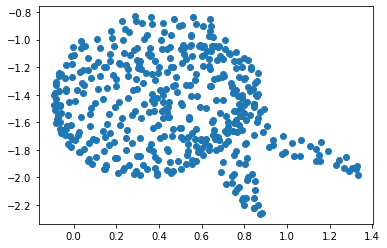

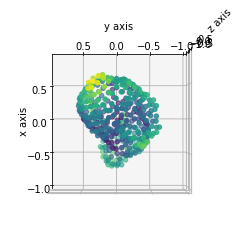

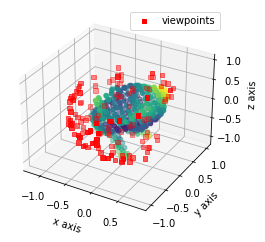

In [61]:
fig1, fig2 = main(filename = "../bunny/reconstruction/bun_zipper_res4.ply")

# 3D Reconstruction

- [Triangulation](#sec-syllabus)
  
- **[Structure from Motion](#sec-ece)**
  - Affine
  - **Projective**

- [Active and Volumetric Stereo](#sec-ece)

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Recall: 3D Reconstruction

<center><img src="figs/05_sfm_ex.png" width=1000px alt="default"/></center>

# Recall: 3D Reconstruction (Monuments)

<center><img src="figs/05_palmyra.png" width=600px alt="default"/></center>

# Recall: 3D Reconstruction (Robotics)

<center><img src="figs/05_robotics.jpeg" width=650px alt="default"/></center>

# Recall: Structure from Motion (SfM)


$\color{#EF5645}{\text{Given:}}$ Image points $x_{ij}$ representing 3D points $X_j$ in camera $i$ with projection matrix $M_i$: 

$$x_{ij} = M_i X_j.$$

$\color{#EF5645}{\text{Goal:}}$ Recover:
- structure of the scene, i.e. the $X_j$,
- camera projection matrices, i.e. the $M_i$.

<center><img src="figs/05_sfm.png" width=500px alt="default"/></center>


# Assumptions for SfM

Depending on the class of the projection matrices, we get different SfM:
- $\color{#EF5645}{\text{Affine SfM}}$: If $M$ corresponds to an affine transformation:
 - $M = \begin{bmatrix}
A & b \\
0 & 1
\end{bmatrix}$ which we also write $M = \begin{bmatrix}
A & b 
\end{bmatrix}$ so that $x = MX = AX +b$.
- $\color{#EF5645}{\text{Projective SfM}}$: If $M$ is projective:
  - $M = \begin{bmatrix}
A & b \\
v & 1
\end{bmatrix}$ which we also write $M = \begin{bmatrix}
A & b 
\end{bmatrix}$, but:
    - $A$ is $3 \times 3$, $b$ is $3 \times 1$ and $||b||^2 = 1$.
  - $\rightarrow$ our focus today.

# Solutions and Ambiguity

We write:
- Motion matrix $M$: matrix containing camera parameters $M_i$
- Structure matrix $S$: matrix about the 3D points $X_j$

and solve for $M, S$.

$\color{#EF5645}{\text{Recall, in affine SfM}}$:
- solutions for structure $S$ and motion $M$ can be found up to an affine transformation $A$
  - If $M, S$ is a solution, then $MA$, $A^{-1}S$ is also a valid solution.


# Solutions and Ambiguity

We write:
- Motion matrix $M$: matrix containing camera parameters
- Structure matrix $S$: matrix about the 3D points $X_j$

and solve for $M, S$.


$\color{#EF5645}{\text{Now, in perspective SfM}}$:
- solutions for structure $S$ and motion $M$ can be determined up a projective transformation $H$
  - If $M, S$ is a solution, then $MH$, $H^{-1}S$ will also be a valid solution.


# Projective SfM: Unknowns and Equations

$\color{#EF5645}{\text{Given:}}$
- $x_{ij}$: $2mn$ elements, which will give $2mn$ equations

$\color{#EF5645}{\text{Goal:}}$ Recover:
- structure of the scene, i.e. the $X_j$: $3n$ unknowns
- camera parameters $M_i = \begin{bmatrix}
A_i & b_i \\
v_i & 1
\end{bmatrix}$: $11m$ unknowns:
  - rewritten $M_i = \begin{bmatrix}
A_i & b_i 
\end{bmatrix}$ with $||b_i||^2 = 1$

$\rightarrow$ there is a minimum number of $2D$ images that we need to solve this problem.

# Projective SfM: Unknowns and Equations

The SfM problem can be solved if we have at least enough equations for the number of unknowns, i.e.
$$2 mn \geq 11m + 3n.$$

$\color{#047C91}{\text{Example}}$:
- Given that we have two cameras, i.e. $m = 2$, how many 3D points do we need?
- Given that we have 5 $3D$ points i.e. $n=5$, how many cameras do we need?
Because cameras and points can only be recovered up to a 4 × 4 projective transformation up to scale (15 parameters), we have 11m + 3n − 15 unknowns in 2mn equations. From these facts, we can determine the number of views and observations that are required to solve for the unknowns.


# Perspective SfM: Algebraic Approach

$\color{#EF5645}{\text{Method:}}$
- Compute the camera projection matrices of all cameras, i.e. the $M_i$,
  - by taking them two-by-two,
- Compute the positions of the 3D points $X_j$.

<center><img src="figs/05_persSFM.png" width=850px alt="default"/></center>



# Algebraic Approach: Solving for $M_1, M_2$


$\color{#EF5645}{\text{Given:}}$ Points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrices $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Goal:}}$ Recover camera parameters $M_1, M_2$.

$\color{#EF5645}{\text{Remark:}}$ Each $M_i$ can only be computed up a perspective transformation $H$:
  - We can consider a $H$ such that $M_1H$ is canonical,
  - i.e. such that $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$ and $M_2H^{-1} = \begin{bmatrix} A & b \end{bmatrix}$ as $3 \times 4$ matrices.
    - Recall that $||b||^2 = 1$.


# Algebraic Approach: Solving for $M_1, M_2$


$\color{#EF5645}{\text{Given:}}$ Points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrices $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Goal (re-stated):}}$
- Assume $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$
- Recover camera parameters $A, b$ from $M_2H^{-1} = \begin{bmatrix} A & b \end{bmatrix}$.

$\color{#EF5645}{\text{Remark:}}$ In contrast to the affine case, now $A$ is $3 \times 3$ and $b$ is $3 \times 1$.

# Algebraic Approach: Solving for $M_1, M_2$


$\color{#EF5645}{\text{Given:}}$ Points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrices $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Goal (re-stated):}}$
- Assume $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$
- Recover camera parameters $A, b$ from $M_2H^{-1} = \begin{bmatrix} A & b \end{bmatrix}$.

$\color{#EF5645}{\text{Method overview:}}$
1.  $\color{#EF5645}{\text{Set-up equations in $A, b$. }}$
2.  $\color{#EF5645}{\text{Solve equations in $A, b$. }}$

# Set-Up Equations in $A, b$

1.  $\color{#EF5645}{\textbf{Set-up equations in $A, b$. }}$
2.  $\color{#EF5645}{\text{Solve equations in $A, b$. }}$

We have:
$$
\begin{align*}
p &= M_1 P = M_1 H^{-1} H P = \begin{bmatrix} I & 0 \end{bmatrix} \tilde P \\
p' &= M_2 P = M_2 H^{-1} H P  = \begin{bmatrix} A & b \end{bmatrix} \tilde P 
\end{align*}
$$
where we have defined $ \tilde P = H P$.


This leads to:
$$
\begin{align*}
p' 
&= \begin{bmatrix} A & b \end{bmatrix} \tilde P  \\
&= A \tilde P + b \\
&= A \begin{bmatrix} I & 0 \end{bmatrix} \tilde P + b \\
&= A p + b
\end{align*}
$$

# Set-Up Equations in $A, b$

1.  $\color{#EF5645}{\textbf{Set-up equations in $A, b$. }}$
2.  $\color{#EF5645}{\text{Solve equations in $A, b$. }}$

From $p' = Ap +b$, we get: 
- $p' \times b = (A p + b) \times b = A p \times b$
- and $p' \times b$ is perpendicular to $p'$.


Thus:
$$
\begin{align*}
0
&= p'^T (p'\times b) \\
&= p'^T (A p \times b) \\
&= p'^T (b \times Ap) \\
&= p'^T [b]_\times A p \quad\quad \rightarrow \color{#EF5645}{\text{1. Equation in $A, b$}}
\end{align*}
$$
where $[b]_\times$ is the $3 \times 3$ skew-symmetric matrix with entries from $b = (b_1, b_2, b_3)^T$:


$$[b]_\times= \begin{bmatrix}\,\,0&\!-b_{3}&\,\,\,b_{2}\\\,\,\,b_{3}&0&\!-b_{1}\\\!-b_{2}&\,\,b_{1}&\,\,0\end{bmatrix}$$

# Epipolar Constraint and Fundamental Matrix

We introduce definitions related to the equation we just found.

$\color{#EF5645}{\text{Epipolar constraint:}}$ The equation linking $p$ and $p'$ is called the epipolar constraint:
$$p'^T [b]_\times A p = 0.$$

$\color{#EF5645}{\text{Fundamental Matrix:}}$ The matrix $F = [b]_\times A$ such that:
$$p'^T [b]_\times A p = 0,$$
is called the fundamental matrix.

# Algebraic Approach: Solving for $M_1, M_2$

$\color{#EF5645}{\text{Given:}}$ Points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrices $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Goal (re-stated):}}$
- Assume $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$
- Recover camera parameters $A, b$ from $M_2H^{-1} = \begin{bmatrix} A & b \end{bmatrix}$.

$\color{#EF5645}{\text{Method overview:}}$
1.  $\color{#EF5645}{\text{Set-up equations in $A, b$. }}$
2.  $\color{#EF5645}{\textbf{Solve equations in $A, b$. }}$
    - **Compute the fundamental matrix $F = [b]_\times A$**,
    - Given $F$, compute $b$,
    - Given $F, b$, compute $A$.

# Compute $F$ with Eight-Point Algorithm

The Eight-Point Algorithm can be used to compute the fundamental matrix $F$.

$\color{#EF5645}{\text{Intuition:}}$ The fundamental matrix is a $3 \times 3$ matrices with $8$ degrees of freedom.
- Eight-Point Algorithm finds 8 linear constraints to determine $F$
- The 8 linear constraints come from 8 pairs of points.

<center><img src="figs/05_8pt.png" width=750px alt="default"/></center>


# Compute $F$ with Eight-Point Algorithm

The Eight-Point Algorithm can be used to compute the fundamental matrix $F$.

$\color{#EF5645}{\text{Method:}}$ Consider 8 pairs of points between 2 images.
- For each point $j$, write one linear equation in $F$: $p'^T_i F p_i = 0.$
- Solve the linear system in $F$.

<center><img src="figs/05_8pt.png" width=750px alt="default"/></center>

# Algebraic Approach: Solving for $M_1, M_2$

$\color{#EF5645}{\text{Given:}}$ Points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrices $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Goal (re-stated):}}$
- Assume $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$
- Recover camera parameters $A, b$ from $M_2H^{-1} = \begin{bmatrix} A & b \end{bmatrix}$.

$\color{#EF5645}{\text{Method overview:}}$
1.  $\color{#EF5645}{\text{Set-up equations in $A, b$. }}$
2.  $\color{#EF5645}{\textbf{Solve equations in $A, b$. }}$
    - Compute the fundamental matrix $F = [b]_\times A$,
    - **Given $F$, compute $b$,**
    - Given $F, b$, compute $A$.

# Given $F$, Compute $b$ via Least Squares

We set-up an equation for $b$:
$$Fb = [b]_\times A b = (b \times A ) b = 0$$

Compute $b$ as a least square solution of
$$F b = 0,$$
with $‖b‖^2 = 1$.


# Algebraic Approach: Solving for $M_1, M_2$

$\color{#EF5645}{\text{Given:}}$ Points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrices $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Goal (re-stated):}}$
- Assume $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$
- Recover camera parameters $A, b$ from $M_2H^{-1} = \begin{bmatrix} A & b \end{bmatrix}$.

$\color{#EF5645}{\text{Method overview:}}$
1.  $\color{#EF5645}{\text{Set-up equations in $A, b$. }}$
2.  $\color{#EF5645}{\textbf{Solve equations in $A, b$. }}$
    - Compute the fundamental matrix $F = [b]_\times A$,
    - Given $F$, compute $b$,
    - **Given $F, b$, compute $A$.**

# Given $F, b$, Compute $A$

We know that $F = [b]_\times A$.

Thus, $A$ can be found by setting:
$$A = - [b]_\times F.$$

Indeed, we verify that this definition satisfies $[b]_\times A = F$:
$$
\begin{align*}
[b]_\times A 
&= - [b]_\times [b]_\times F \\
&= - (bb^T - |b|^2I) F \\
&= - bb^TF + |b|^2F\\
&= 0 + 1 \cdot F \\
&= F
\end{align*}
$$

# Algebraic Approach: Solving for $M_1, M_2$

$\color{#EF5645}{\text{Given:}}$ Points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrices $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Goal (re-stated):}}$
- Assume $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$
- Recover camera parameters $A, b$ from $M_2H^{-1} = \begin{bmatrix} A & b \end{bmatrix}$.

$\color{#EF5645}{\text{Method overview:}}$
1.  $\color{#EF5645}{\text{Set-up equations in $A, b$. }}$
2.  $\color{#EF5645}{\textbf{Solve equations in $A, b$. }}$
    - Compute the fundamental matrix $F = [b]_\times A$,
    - Given $F$, compute $b$,
    - **Given $F, b$, compute $A$.**

# Perspective SfM: Algebraic Approach

$\color{#EF5645}{\text{Given:}}$ Points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrices $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Method:}}$
- Compute the camera projection matrices of all cameras, i.e. the $M_i$,
  - by taking them two-by-two,
- Compute the positions of the 3D points $X_j$.
  - by applying one of the triangulation methods.


<center><img src="figs/05_triang.png" width=800px alt="default"/></center>

# SfM: Conclusion


$\color{#EF5645}{\text{Given:}}$ Image points $x_{ij}$ representing $X_j$ in cameras $1, 2$ with two projection matrix $M_1$ and $M_2$: 

$$x_{1j} = M_1 X_j, \quad x_{2j} = M_2 X_j$$

$\color{#EF5645}{\text{Goal:}}$ Recover:
- structure of the scene, i.e. the $X_j$
- camera parameters $M_1, M_2$,
- transformation $H$ such that $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$ and $M_2H^{-1} = \begin{bmatrix} A & b \end{bmatrix}$ as $3 \times 4$ matrices .


We get: 
- $M_1 H^{-1} = \begin{bmatrix} I & 0 \end{bmatrix}$ and $M_2H^{-1} = \begin{bmatrix} -[b]_\times F & b \end{bmatrix}$, where $F$ was determined by the 8 points method.
- $X_j$ using a triangulation method.

# Applications: Augmented Reality

Augmented Reality:
- requires a reconstruction of the scene
- naturally uses a moving camera

$\rightarrow$ Perfect for Structure from Motion.

$\color{#EF5645}{\text{Remark:}}$ Also uses:
- accelerometers 
- the fact that the camera is moving, i.e. the knowledge of the camera pose at previous time-step

<center><img src="figs/05_ar.jpeg" width=500px alt="default"/></center>

# Applications: Augmented Reality

Augmented Reality:
- requires a reconstruction of the scene
- naturally uses a moving camera


<center><img src="figs/05_ar2.jpeg" width=600px alt="default"/></center>

# From SfM to SLAM

$\color{#EF5645}{\text{Remark:}}$ In the previous applications, the algorithms also use:
- accelerometers 
- the fact that the camera is moving, i.e. the knowledge of the camera pose at previous time-step

$\color{#EF5645}{\text{SLAM (Simultaneous Localization and Mapping)}}$ works in real-time on an ordered sequence of images acquired from a fixed camera set-up (i.e. one or two particular cameras).

In contrast, SfM approaches:
- often have to work on an unordered set of images,
- often computed in the cloud with little to no time constraints,
- might employ different cameras 
  - E.g. reconstructing notable landmarks, Eiffel tower perhaps from community photos.

# 3D Reconstruction

- [Triangulation](#sec-syllabus)
  
- [Structure from Motion](#sec-ece)

- **[Active and Volumetric Stereo](#sec-ece)**
  - **Stereo: definitions**
  - Active Stereo
  - Volumetric Stereo

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Stereo: Definitions


$\color{#EF5645}{\text{Stereo}}$ is the extraction of 3D information from digital images.

$\color{#EF5645}{\text{Traditional stereo}}$ uses corresponding points $p$ and $p'$ to estimate the location of a 3D point $P$ by triangulation.

$\rightarrow$ What we have been using until now.

<center><img src="figs/05_triang.png" width=800px alt="default"/></center>









# Limitations of Traditional Stereo

Limitations of traditional stereo:
- How can we know that $p$ and $p'$ are actually corresponding points?

<center><img src="figs/05_triang.png" width=900px alt="default"/></center>


# Stereo: Definitions

$\color{#EF5645}{\text{Stereo}}$ is the extraction of 3D information from digital images.


$\color{#EF5645}{\text{Active stereo}}$ replaces one of the two cameras with a device that projects a pattern onto the object that is easily identifiable from the second camera.


$\color{#EF5645}{\text{Volumetric stereo}}$ samples points from a working 3D volume and performs consistency checks to reconstruct the 3D shape.

<center><img src="figs/05_astereo.png" width=650px alt="default"/></center>


<center><img src="figs/05_vstereo.png" width=500px alt="default"/></center>


# 3D Reconstruction

- [Triangulation](#sec-syllabus)
  
- [Structure from Motion](#sec-ece)

- **[Active and Volumetric Stereo](#sec-ece)**
  - Stereo: definitions
  - **Active Stereo**
  - Volumetric Stereo

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Active Stereo: Point $P$

$\color{#EF5645}{\text{Active stereo}}$ replaces one of the two cameras with a device that projects a pattern onto the object that is easily identifiable from the second camera.

<center><img src="figs/05_astereo.png" width=800px alt="default"/></center>

$\color{#EF5645}{\text{Remark}}$: The image plane of the first camera is replaced by a projector virtual plane.

# Active Stereo: Point $P$

$\color{#EF5645}{\text{Active stereo}}$ replaces one of the two cameras with a device that projects a pattern onto the object that is easily identifiable from the second camera.

<center><img src="figs/05_astereo.png" width=600px alt="default"/></center>


$\rightarrow$ correspondence problem solved!
- we know what $p$ we are projecting, e.g. bright red dot,
- thus we know how to look out for $p'$.

# Active Stereo: Line $S$

$\color{#EF5645}{\text{Active stereo}}$ replaces one of the two cameras with a device that projects a pattern onto the object that is easily identifiable from the second camera.

<center><img src="figs/05_astereo2.png" width=850px alt="default"/></center>

To get several points:
- Project a vertical stripe $s$ instead of a single point $p$.
- Swipe the line across the scene

$\rightarrow$ Recover the entire shape.




# Active Stereo: Line $S$ - Limitations

$\color{#EF5645}{\text{Active stereo}}$ replaces one of the two cameras with a device that projects a pattern onto the object that is easily identifiable from the second camera.

<center><img src="figs/05_astereo2.png" width=800px alt="default"/></center>

Limitations:
- slow: need to swipe across the entire object
- cannot capture deformations in real time.



# Active Stereo: Patterns

$\color{#EF5645}{\text{Active stereo}}$ replaces one of the two cameras with a device that projects a pattern onto the object that is easily identifiable from the second camera.

<center><img src="figs/05_astereo3.png" width=800px alt="default"/></center>

Instead of projecting a single stripe:
- project known pattern of different stripes to the entire object.

$\rightarrow$ addresses previous limitations.

$\color{#EF5645}{\text{Remark}}$: Colors of these stripes are designed such that stripes can be uniquely identified from the image.






# Active Stereo: Patterns

$\color{#EF5645}{\text{Active stereo}}$ replaces one of the two cameras with a device that projects a pattern onto the object that is easily identifiable from the second camera.

<center><img src="figs/05_astereo3.png" width=600px alt="default"/></center>


$\color{#EF5645}{\text{Remark}}$: Colors of the stripes are designed such that stripes can be uniquely identified from the image.


# Active Stereo: Patterns

- Kinect v1 is an active 3D depth estimation setup...

<center><img src="figs/05_kinect.png" width=800px alt="default"/></center>

# Active Stereo: Patterns

- Kinect v1 is an active 3D depth estimation setup...
- ... that employs IR laser structured patterns for depth calculation.


<center><img src="figs/05_kinect.png" width=800px alt="default"/></center>

# Active Stereo: Conclusion


- Powers many versions of modern depth sensors:
  - e.g. original version of the Microsoft Kinect. 
- In practice, these sensors use infrared laser projectors:
  - allows it to capture video data in 3D under any ambient light conditions.

# 3D Reconstruction

- [Triangulation](#sec-syllabus)
  
- [Structure from Motion](#sec-ece)

- **[Active and Volumetric Stereo](#sec-ece)**
  - Stereo: definitions
  - Active Stereo
  - **Volumetric Stereo**

- [Reconstruction in Biology (invited speaker)](#sec-ece)

# Volumetric Stereo


$\color{#EF5645}{\text{Volumetric stereo}}$ samples points from a working 3D volume and performs "**consistency checks**" to reconstruct the 3D shape.
- E.g. checks that the point currently sampled can belong to the object.


<center><img src="figs/05_vstereo.png" width=800px alt="default"/></center>

$\color{#EF5645}{\text{Remark:}}$ This requires a limited "working" volume:
- mostly used for recovering 3D models of specific objects,
- not used to reconstruct a scene, which may be unbounded.



# Volumetric Stereo: Applications

Teach an AI to dance? Need to construct a training dataset.

$\rightarrow$ Reconstruct 3D volume of dancing bodies.

<center><img src="figs/05_ex_volm.png" width=400px alt="default"/></center>

<center>Reconstruction compared to shape-from-silhouette and multi-view stereo for an 8 camera setup with 45 • camera baseline and 2MPixel resolution. [Starck 2006].</center>



# Consistency Checks and Main Techniques



What are "consistency checks"?

$\rightarrow$ different techniques:
- space carving
- shadow carving, and 
- voxel coloring.

<center><img src="figs/05_vstereo.png" width=800px alt="default"/></center>

# Consistency Checks and Main Techniques



What are "consistency checks"?

$\rightarrow$ different techniques:
- **space carving**
- shadow carving, and 
- voxel coloring.

<center><img src="figs/05_vstereo.png" width=800px alt="default"/></center>

# Space Carving

$\color{#EF5645}{\text{Space Carving:}}$ is a method of volumetric stereo that:
- Computes boundaries of the object in each camera view: **Contour detection**
- Scans through the bounding volume and projects in each image's view
- **Consistency check**: 
  - Keeps points that are inside the object's pre-computed contour

<center><img src="figs/05_space_carving.png" width=800px alt="default"/></center>

# Space Carving: Definitions


$\color{#EF5645}{\text{The silhouette}}$ of an object is the set of all pixels that form the visible portion of the object.

$\color{#EF5645}{\text{The visual cone}}$ is the set of all possible points that can project into the silhouette of the object in the image.


<center><img src="figs/05_silhouette_cone.png" width=800px alt="default"/></center>


# Space Carving: Silhouettes

<center><img src="figs/05_silhouettes.png" width=800px alt="default"/></center>

# Space Carving: Visual Hull

$\color{#EF5645}{\text{Space Carving:}}$ 
- **Consistency check**: 
  - Keeps points that are inside the object's pre-computed contour


$\rightarrow$ object lies in the working volume and the intersection of each camera's visual cone.

$\color{#EF5645}{\text{The visual hull}}$ is the intersection of the visual cones of the cameras.


<center><img src="figs/05_visual_hull.png" width=750px alt="default"/></center>

# Space Carving: Result

<center><img src="figs/05_space_carving2.png" width=900px alt="default"/></center>

# Space Carving: Limitations

- Trade-off resolution versus efficiency: 
  - Scales linearly with the number of voxels in the grid.
  - Scales cubically with the resolution:
      - Increase resolution 
      - $\rightarrow$ reduce the size of each voxel
      - $\rightarrow$ number of voxels required increases cubically. 
      - $\rightarrow$ large increases in computational time.



<center><img src="figs/05_space_carving2.png" width=500px alt="default"/></center>

# Space Carving: Limitations (2)

- Accuracy not robust and strongly depends on:
  - the number of views, i.e. the number of cameras
  - the preciseness of the silhouette, i.e. the quality of contour detection method.
  
$\rightarrow$ we can end of up with a very loose estimate of the visual hull of the object.



<center><img src="figs/05_space_carving2.png" width=500px alt="default"/></center>

# Space Carving: Limitations (3)


- Concavitiy:
    - Incapable of modeling certain object's concavities.

<center><img src="figs/05_concave.png" width=850px alt="default"/></center>

# Remark: Green Background to Improve Silhouettes

As space curving relies on good silhouette detection (contour detection), we can help this process by using convenient backgrounds, e.g. green backgrounds.

<center><img src="figs/05_matrix.jpeg" width=600px alt="default"/></center>


$\color{#EF5645}{\text{Remarks:}}$
- Why green? In short: because people are not green.
- Green screens have many other applications, e.g. allow us to put in the desired background.

# Consistency Checks and Main Techniques


What are "consistency checks"?

$\rightarrow$ different techniques:
- space carving
- **shadow carving**, and 
- voxel coloring.

<center><img src="figs/05_vstereo.png" width=600px alt="default"/></center>

# Shadow Carving


$\color{#EF5645}{\text{Shadow carving}}$ augments space carving by using **self-shadows** to better estimate the concavities.

$\color{#EF5645}{\text{Self-Shadows}}$ are the shadows that an object projects on itself.


$\color{#047C91}{\text{Example}}$: Concave objects often cast self-shadows in the concave region.

<center><img src="figs/05_shadows.png" width=200px alt="default"/></center>


# Shadow Carving


$\color{#EF5645}{\text{Shadow carving}}$ augments space carving by using **self-shadows** to better estimate the concavities.
- Add array of lights in known positions around the camera.
- Turn them on and off to create self-shadows.

<center><img src="figs/05_shadow_carving.png" width=700px alt="default"/></center>


# Shadow Carving

$\color{#EF5645}{\text{Shadow carving}}$ augments space carving by using **self-shadows** to better estimate the concavities.
- Add array of lights in known positions around the camera.
- Turn them on and off to create self-shadows.
  - Each light produces a different self-shadow on the object. 
    - Identify pixels from the shadow in the image plane.
    - Find voxels from the visual cone of the shadow. 
    - Eliminate voxels in the concavity.


<center><img src="figs/05_shadow_carving2.png" width=700px alt="default"/></center>

# Space versus Shadow Carving

$\color{#EF5645}{\text{Shadow carving}}$ augments space carving by using **self-shadows** to better estimate the concavities.

<center><img src="figs/05_space_vs_shadow.png" width=900px alt="default"/></center>

# Space versus Shadow Carving

$\color{#EF5645}{\text{Shadow carving}}$ augments space carving by using **self-shadows** to better estimate the concavities.

<center><img src="figs/05_space_vs_shadow2.png" width=400px alt="default"/></center>
<center>Top: Space Carving. Bottom: Shadow Carving.</center>

# Shadow Carving: Limitations

- Trade-off resolution versus efficiency: 
  - Runtime dependent on the resolution of the voxel grid: scales cubically.
  - With N lights, then shadow carving takes approximately N + 1 times longer than space carving:
    - Because each voxel needs to be projected into the camera and each of the N lights.


<center><img src="figs/05_shadow_carving2.png" width=800px alt="default"/></center>


# Shadow Carving: Limitations (2)

- Cannot handle cases all types of objects:
  - Example: Cannot reconstruct objects with reflective or low albedo regions
    - Because shadows cannot be detected accurately in such conditions.

<center><img src="figs/05_shadow_carving2.png" width=800px alt="default"/></center>


# Consistency Checks and Main Techniques

What are "consistency checks"?

$\rightarrow$ different techniques:
- space carving
- shadow carving, and 
- **voxel coloring.**

<center><img src="figs/05_vstereo.png" width=600px alt="default"/></center>

# Voxel Coloring

$\color{#EF5645}{\text{Voxel Coloring}}$ modifies space carving by using color consistency instead of contour consistency.



<center><img src="figs/05_voxel_coloring.png" width=900px alt="default"/></center>



# Voxel Coloring

$\color{#EF5645}{\text{Voxel Coloring}}$ modifies space carving by using color consistency instead of contour consistency.

For each (colored) voxel:
- Look at its corresponding projections in each of the images.
- Compare the color of each of these projections. 
- **Consistency check**:
  - If the colors of these projections **sufficiently match**, then mark the voxel as part of the object. 


<center><img src="figs/05_voxel_coloring.png" width=400px alt="default"/></center>


# Voxel Coloring: Advantages

Advantage (Compared to space carving and shadow carving):
- color associated with the projections can be transferred to the voxel, giving a colored reconstruction.

<center><img src="figs/05_voxel_coloring.png" width=400px alt="default"/></center>

# Voxel Coloring: Limitations

Limitations:
- Reconstruction not necessarily unique. 
  - Finding the true, unique solution complicates the problem of reconstruction by voxel coloring
  - Possible to remove the ambiguity in the reconstruction by introducing a visibility constraint on the voxel, which requires that the voxels be traversed in a particular order.


<center><img src="figs/05_vanilla_voxel_coloring.png" width=800px alt="default"/></center>

# 3D Reconstruction

- [Triangulation](#sec-syllabus)
  
- [Structure from Motion](#sec-ece)

- **[Active and Volumetric Stereo](#sec-ece)**
  - Stereo: definitions
  - Active Stereo
  - **Volumetric Stereo**

- [Reconstruction in Biology (invited speaker)](#sec-ece)